In [55]:
from IPython.display import Image
import numpy as np
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


# Задания для самостоятельного решения


### 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [10]:
sigma2 = 225
B = 0.95
acc = 3

A = 1 - B
z = 1 - A/2
print(A,z)
z_a = 0.8289 #по таблице нормального распределения

n = sigma2 * pow(z_a / acc, 2)
n #минимально необходимый объем выборки

0.050000000000000044 0.975


17.176880249999996

### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [17]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

t , p  = stats.ttest_ind(population_men,population_women)
print("t = " + str(t))
print("p = " + str(p))



t = 3.854925275601392
p = 0.00011576563964353696


t = 3.854925275601392
p = 0.00011576563964353696

Уровень значимости равен 0.00115 и t-score небольшой, значит различие между выборками незначительно

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [20]:
sigma = 150  # Стандартное отклонение
B = 0.95 #уровень доверия
acc = 50 #%         #Погрешность

#N = ((sigma*Z)/e)**2


A = 1 - B
z = 1 - A/2
print(A,z)
z_a = 0.8289 #по таблице нормального распределения

n =  pow(z_a / acc * sigma, 2)
n #минимально необходимый объем выборки

0.050000000000000044 0.975


6.183676889999999

### 4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [21]:
observations = pd.DataFrame([[14,36],[15,45]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,14,36
Солнце,15,45


In [25]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations)  # Возможно вам пригодится эта функция.

if pvalue <= 0.05:
    print(f'уровень значимости = {pvalue} => волшебник умеет предсказывать погоду')
else:
    print(f'уровень значимости = {pvalue} => волшебник НЕ умеет предсказывать погоду')

уровень значимости = 0.828664440194697 => волшебник НЕ умеет предсказывать погоду


### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: 
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [29]:
data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

def mean_confidence_interval(data, confidence=0.9):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h


print(mean_confidence_interval(data, 0.95))


(5.722330588772512, 6.4411764705882355, 7.160022352403959)


### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

t = 7.35744682757447
p = 2.1159475572725764e-11


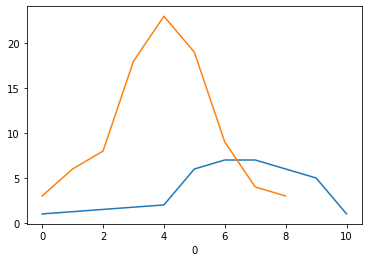

In [43]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t , p  = stats.ttest_ind(data_1,data_2)
print("t = " + str(t))
print("p = " + str(p))

df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)
df_1.groupby(0)[0].count().plot()
df_2.groupby(0)[0].count().plot()

Вывод:
уровень значимости = 2.115 => выборки принадлежат к одному множеству

### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

### Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное,  Альтернативная гипотеза - распределение не нормальное.


### Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

уровень значимости равен 0.03 и меньше 0.05, следовательно нулевая гипотеза ошибочна и распределение не нормальное 

### 8. Первая выборка — это пациенты, которых лечили препаратом А.  Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

#### а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

#### b) При каком минимальном P-values различия были бы уже значимы? 

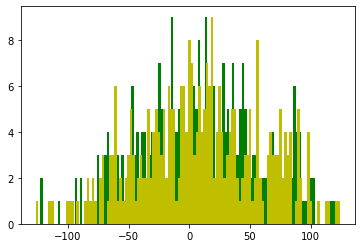

In [80]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)


plt.hist(A, bins=120, color='g')
plt.hist(B, bins=120, color='y')
plt.show()

In [81]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.740034005650458)

уровень значимости равен 0.74 и больше 0.05, следовательно нулевая гипотеза верна и различия эффективности препаратов случайны

In [83]:
test = []
for i in range(1000):
    np.random.seed(11)
    A = stats.norm.rvs(scale=50,loc=10,size=300)
    B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)
    t , p  = stats.ttest_ind(population_men,population_women)
    test.append(p)

In [84]:
print(f'при уровене значимости меньше {min(test)} различия между препаратами были бы более значимы')

при уровене значимости меньше 0.00011576563964353696 различия между препаратами были бы более значимы
